In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import ast
import warnings

# Configuration for plotting and warnings
sns.set(context='notebook', font_scale=1.1, style='ticks', rc={'figure.figsize': (8, 3), 'figure.facecolor': 'none', 'axes.facecolor': 'none'})
plt.set_loglevel('WARNING')
plt.rcParams.update({'lines.markeredgewidth': 1})
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")

### How much time does it take with the simulator to solve 1 scenario?

In [176]:
TOTAL_SCENES = 15
NOCTURNE_CASPS = 416 

df_time_to_solve = pd.DataFrame({
    'Scene' : list(range(0, TOTAL_SCENES)),
    'Time (s)': [410, 254, 954, 967, 550, 680, 700, 465, 2156, 2000, 845, 148, 147, 701, 690],
    'Steps': [1.2e6, 700_000, 1.7e6, 1.72e6, 1.6e6, 2.2e6, 2.2e6, 2.1e6, 9.5e6, 9.1e6, 4.2e6, 900_000, 900_000, 12e6, 3.4e6],
    'Threshold': '95%',
    }
)

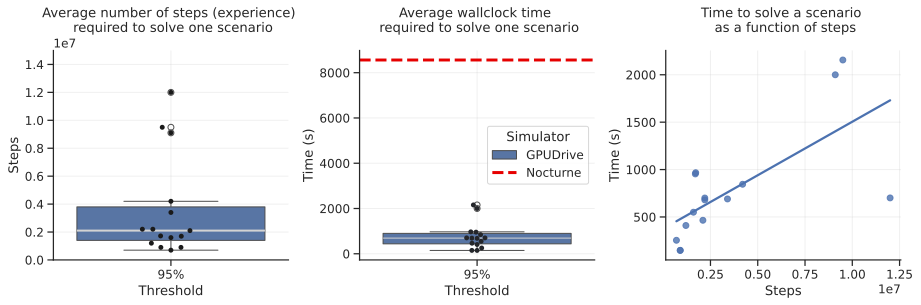

In [197]:
fig, axs = plt.subplots(1, 3, figsize=(13, 4.5))

sns.boxplot(data=df_time_to_solve, x='Threshold', y='Steps', medianprops={"color": "lightgrey", "linewidth": 2}, ax=axs[0]) # inner_kws=dict(box_width=15, whis_width=2, color=".8"), 
sns.swarmplot(data=df_time_to_solve, x='Threshold', y='Steps', palette=['k'], hue='Threshold', marker='.', size=10, ax=axs[0])

sns.boxplot(data=df_time_to_solve, x='Threshold', y='Time (s)', medianprops={"color": "lightgrey", "linewidth": 1}, ax=axs[1], label='GPUDrive')
sns.swarmplot(data=df_time_to_solve, x='Threshold', y='Time (s)', hue='Threshold', color='b', ax=axs[1])

axs[1].axhline(y = df_time_to_solve['Steps'].values.mean() / NOCTURNE_CASPS, color = '#e60000', linestyle = '--', linewidth=3, label='Nocturne')

axs[0].set_title('Average number of steps (experience) \n required to solve one scenario', y=1.06)
axs[1].set_title('Average wallclock time \n required to solve one scenario', y=1.06)
axs[2].set_title('Time to solve a scenario \n as a function of steps', y=1.06)
axs[0].grid(True, alpha=0.3)
axs[1].grid(True, alpha=0.3)
axs[2].grid(True, alpha=0.3)
axs[1].legend(loc='center right', facecolor='white', title='Simulator')
axs[0].set_ylim([0, 1.5e7])

sns.regplot(data=df_time_to_solve, x='Steps', y='Time (s)', ax=axs[2], ci=None)

sns.despine()
plt.tight_layout()

fig.savefig('steps_vs_time_boxplot.pdf', dpi=300, bbox_inches='tight')

In [190]:
df_time_to_solve.describe()

,Scene,Time (s),Steps
count,15.000000,15.000000,1.500000e+01
mean,7.000000,777.800000,3.561333e+06
std,4.472136,588.443977,3.606165e+06
min,0.000000,147.000000,7.000000e+05
25%,3.500000,437.500000,1.400000e+06
50%,7.000000,690.000000,2.100000e+06
75%,10.500000,899.500000,3.800000e+06
max,14.000000,2156.000000,1.200000e+07


In [194]:
# Median minutes
df_time_to_solve['Time (s)'].median() / 60

11.5

In [195]:
# Mean minutes
df_time_to_solve['Time (s)'].mean() / 60

12.963333333333333

In [196]:
# Mean seconds
df_time_to_solve['Time (s)'].mean()

777.8

In [199]:
# Time it takes to solve a scenario in nocturne in seconds
df_time_to_solve['Steps'].values.mean() / NOCTURNE_CASPS

8560.897435897436